In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython.display import Image
from IPython import get_ipython
ipython = get_ipython()

# Autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Ignore exceptions
import expectexception

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Visualizations
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Activate the automatic conversion for pandas
from rpy2.robjects import pandas2ri
pandas2ri.activate()

# Load the needed extension for the %%R cell magic
%load_ext rpy2.ipython

# Suppress rpy2 runtime warnings
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)

# Load ipywidgets module
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [3]:
%%R

# Visualization
library(ggplot2)
library(ggalt)
library(ggExtra)
library(ggcorrplot)
library(ggthemes)
library(ggdendro)
library(GGally)
library(ggrepel)
theme_set(theme_light())

# Tidyverse library
library(scales)
library(dplyr)
library(tidyr)
library(forcats)
library(readr)
library(purrr)

# String manipulations
library(tools)
library(lubridate)

# Machine Learning Related
library(car)
library(caTools)
library(pROC)
library(partykit)

# Misc
library(psych)
library(mice)

In [4]:
# Retrieve previous imputated dataset

train = pd.read_csv('imputed_data/imputed_train.csv')
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

test = pd.read_csv('imputed_data/imputed_test.csv')
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

In [7]:
from collections import Counter

Counter(y_train)

Counter({0: 59000, 1: 1000})

In [ ]:
%%R -i train,X_train,X_test -o y_pred_train,y_pred

LMT = glmtree(class ~ ., data = train, family = binomial) # Train a 5-fold cv Logistic Model Tree
y_pred_train = predict(LMT, newdata = X_train, type = "response") 
y_pred = predict(LMT, newdata = X_test, type = "response")

Had a hard time installing weka, this equivalent r package took ages to train. *I gave up...*

In [8]:
# f. SMOTE

from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_res, y_res = sm.fit_resample(X_train, y_train)

In [9]:
Counter(y_res)

Counter({0: 59000, 1: 59000})

After performing SMOTE, we can see the number of positive class now equal the negative class.

In [ ]:
train_smote = pd.concat([pd.DataFrame(X_res, columns=X_train.columns), 
                         pd.DataFrame(y_res, columns=['class'])], axis=1)
X_train_smote = train_smote.iloc[:, :-1]
y_train_smote = train_smote.iloc[:, -1]

In [ ]:
%%R -i train_smote,X_train_smote,X_test -o y_pred_train_smote,y_pred_smote

LMT_smote = glmtree(class ~ ., data = train_smote, family = binomial)
y_pred_train_smote = predict(LMT_smote, newdata = X_train_smote, type = "response") 
y_pred_smote = predict(LMT_smote, newdata = X_test, type = "response")

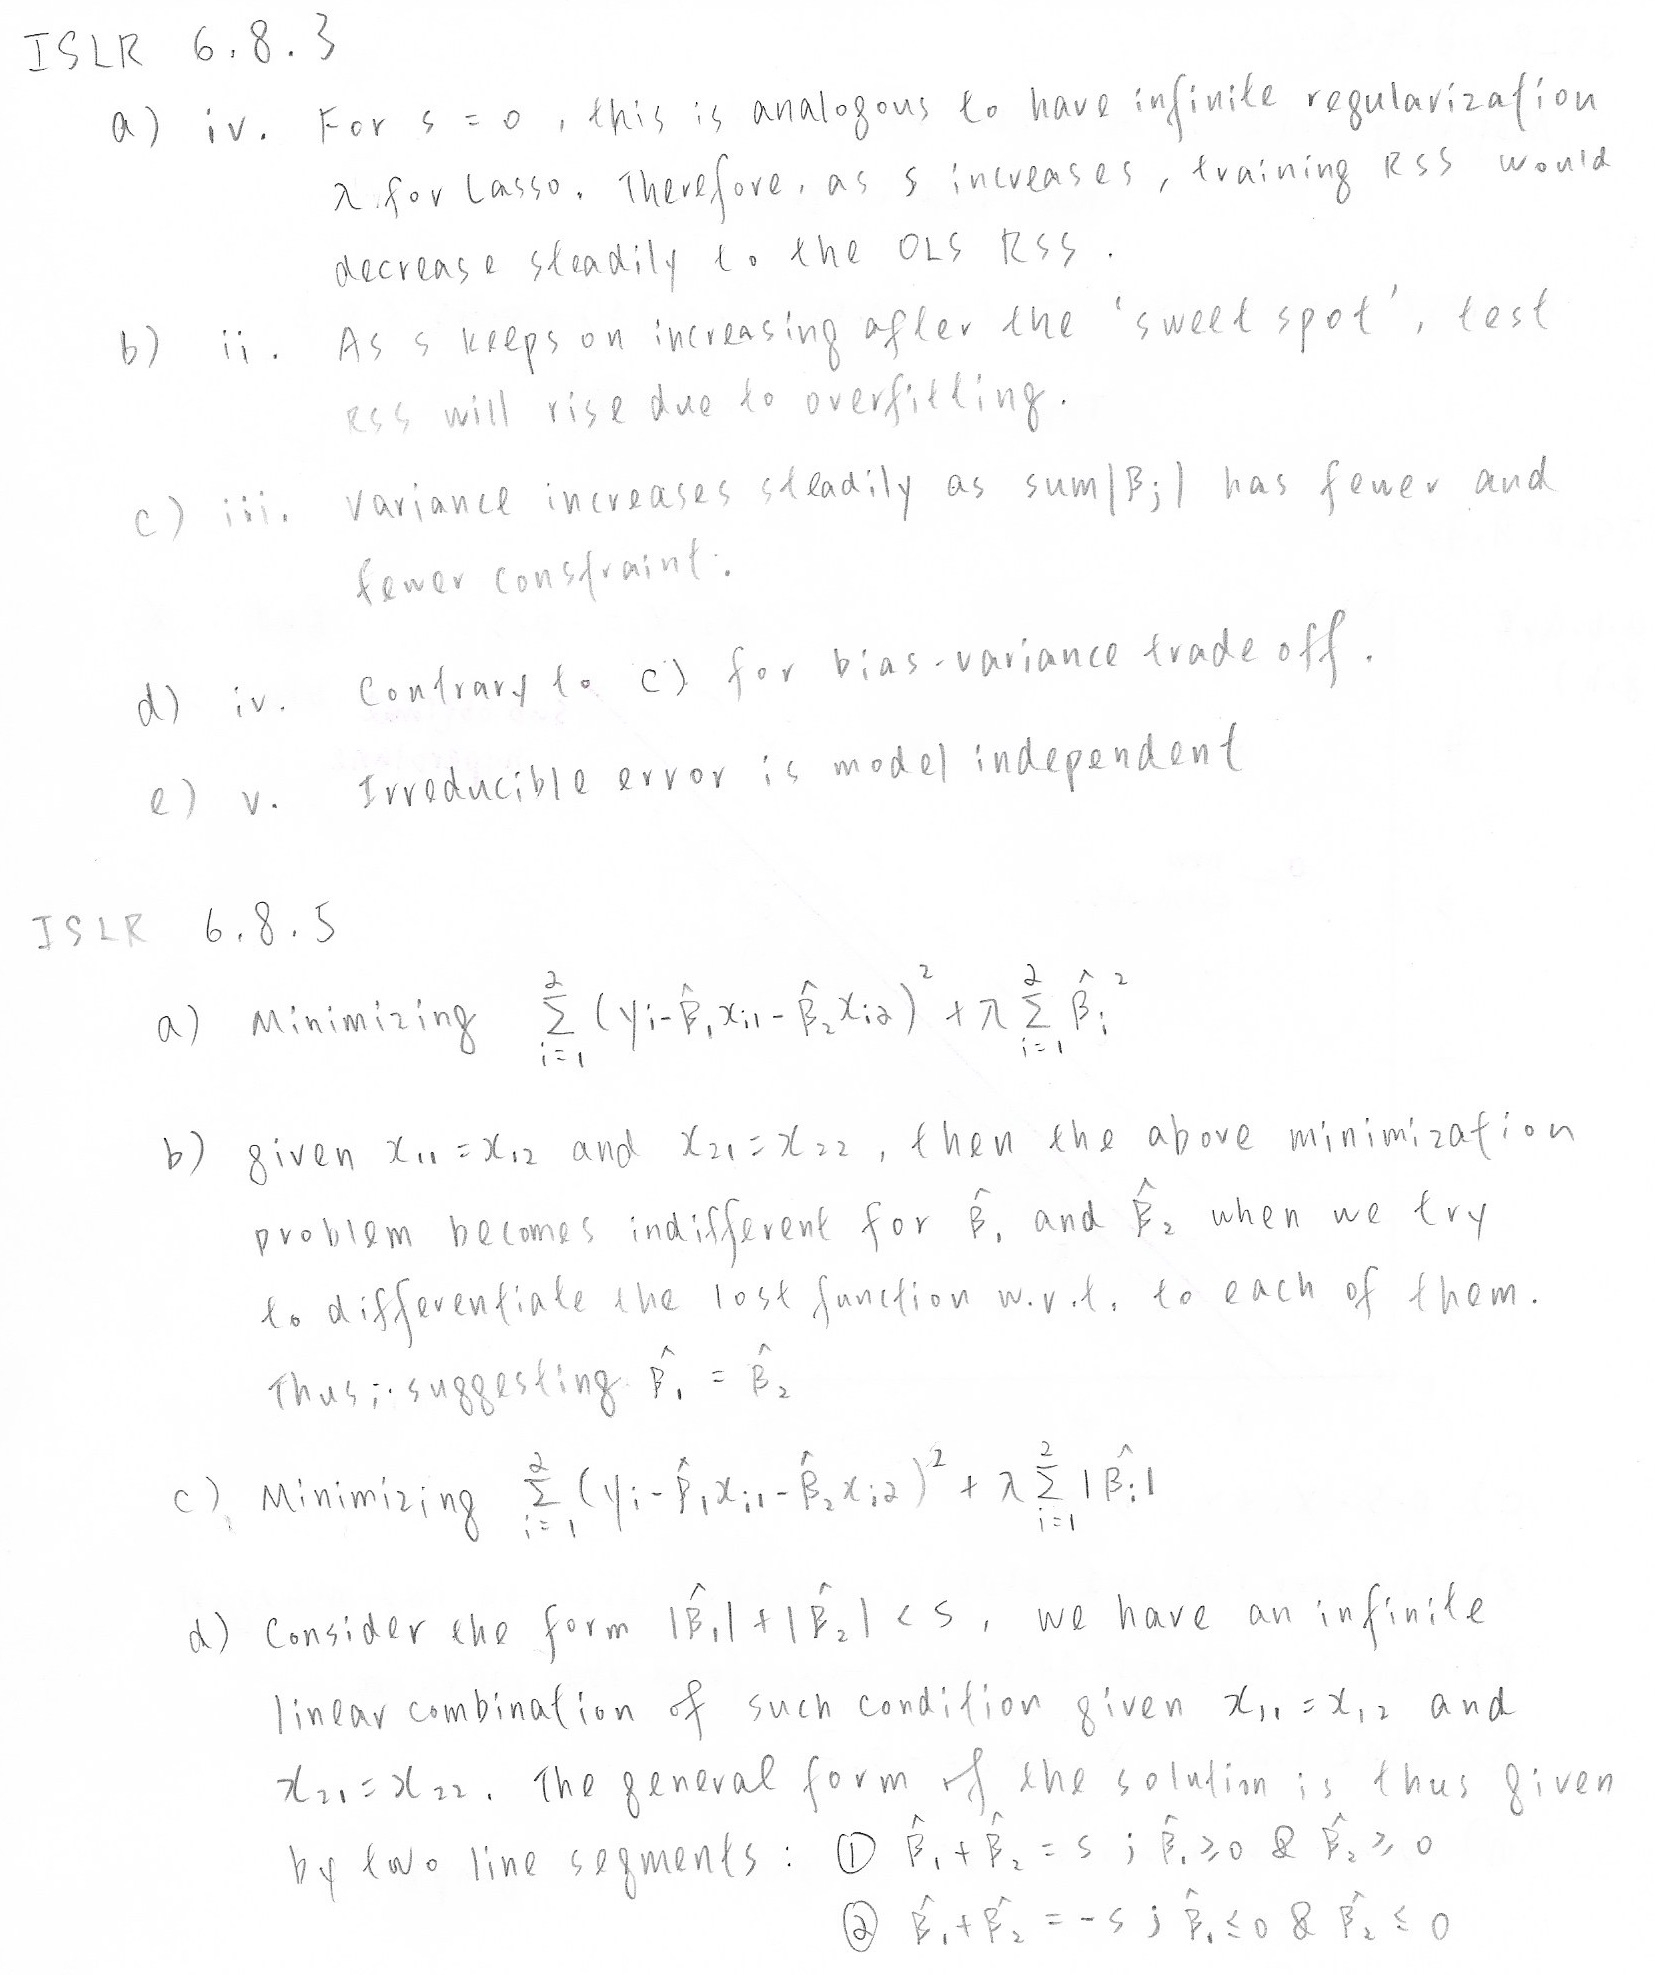

In [10]:
Image('HW4_image/islr_hw4_p1.jpg')

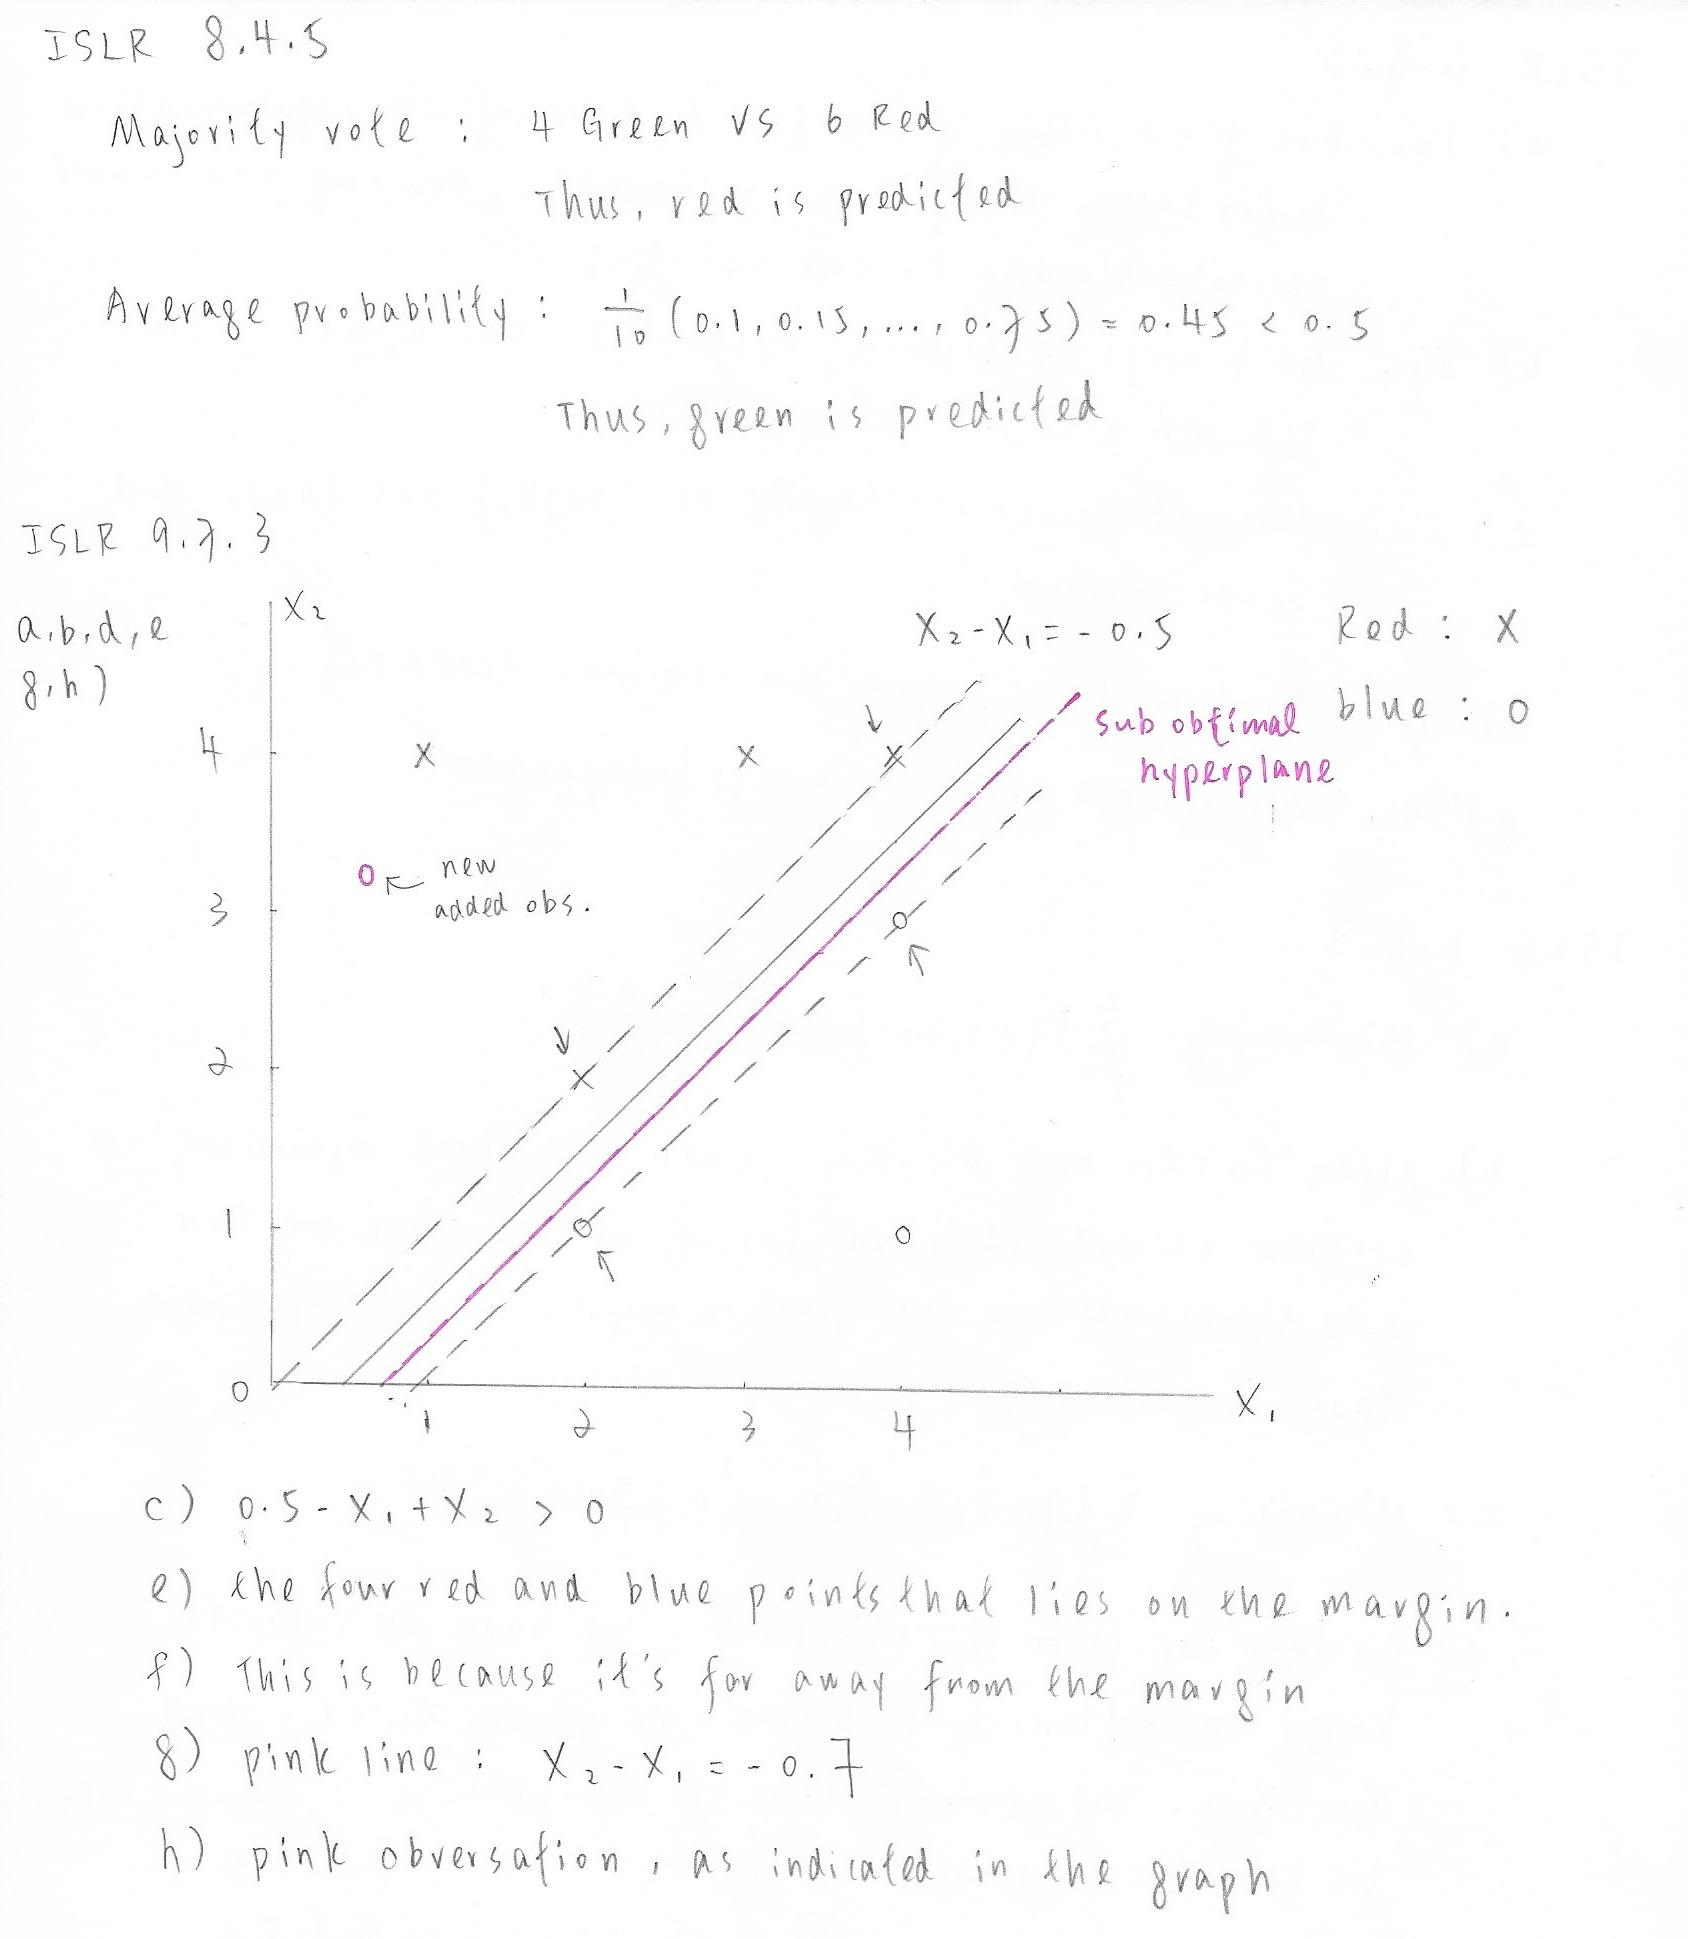

In [11]:
Image('HW4_image/islr_hw4_p2.jpg')